# Training analysis
This section analyses the training of the model over several epochs and tries to determine which is the sweet spot in which training should stop.

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [24]:
sgd_steps_loss = []

with open("./model/steps_loss.npy", "rb") as steps_loss:
    sgd_steps_loss = np.load(steps_loss)

sgd_steps_loss.shape[0] / 8

4604.0

In [32]:
training_list_size = int(sgd_steps_loss.shape[0]/ 8)  # size of each batch

steps_loss_arr = sgd_steps_loss.tolist()
max_loss_index = np.argmax(sgd_steps_loss)
max_loss = steps_loss_arr[max_loss_index]
min_loss = np.amin(sgd_steps_loss, axis=0)
min_loss_index = steps_loss_arr.index(min_loss)

print(f"Maximum loss: {max_loss} at index: {max_loss_index}")
print(f"Minimum loss: {min_loss} at index: {min_loss_index}")

Maximum loss: 4.949447154998779 at index: 472
Minimum loss: 3.80983910872601e-05 at index: 32609


# Observation of General Training Over Time
Analysing visually how the training went over time from start to finish

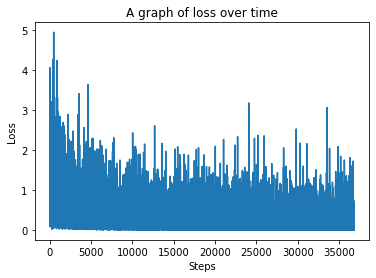

In [33]:
plt.plot([i for i, _ in enumerate(sgd_steps_loss)], sgd_steps_loss)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("A graph of loss over time")
plt.show()

## Split Over Each Training Epoch
This tries to analyse how the training went over each individual training loop for all 8 of them.

In [40]:
previous_epoch = 0
current_epoch = training_list_size;

epoch_split = []

min_epoch_nubmer = 0

for i in range(8):
    epoch_split.append(sgd_steps_loss[previous_epoch: current_epoch])
    if previous_epoch < min_loss_index and min_loss_index < current_epoch:
        min_epoch_number = i

    current_epoch += training_list_size
    previous_epoch += training_list_size

print(f"Epoch Number: {min_epoch_number}")

Epoch Number: 7


## Decision on When to Stop Training
Since the least loss is contained in the 7th epoch, we will observe the graph trend in the 7th, 6th and 8th epoch to determine where training stops.

In [68]:
def sample_by_hundreds(loss_list):
    x_axis = []
    y_axis = []
    for i in range(0, 4064, 100):
        x_axis.append(i)
        y_axis.append(loss_list[i])
    
    x_axis.append(4604)
    y_axis.append(loss_list[-1])
    
    return x_axis, y_axis

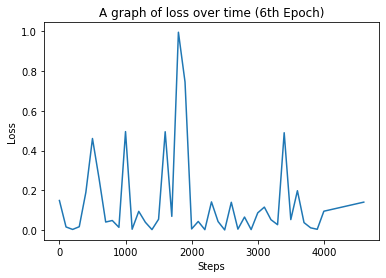

In [69]:
# 6th epoch:
x_axis, y_axis = sample_by_hundreds(epoch_split[5])
plt.plot(x_axis, y_axis)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("A graph of loss over time (6th Epoch)")
plt.show()

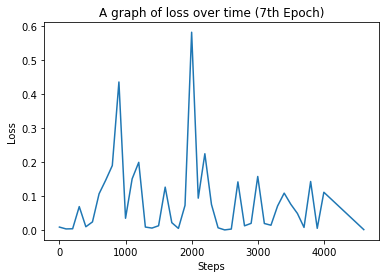

In [70]:
# 6th epoch:
x_axis, y_axis = sample_by_hundreds(epoch_split[6])
plt.plot(x_axis, y_axis)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("A graph of loss over time (7th Epoch)")
plt.show()

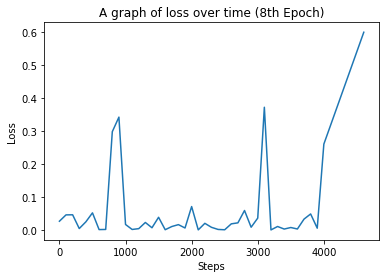

In [72]:
# 8th epoch:
x_axis, y_axis = sample_by_hundreds(epoch_split[7])
plt.plot(x_axis, y_axis)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("A graph of loss over time (8th Epoch)")
plt.show()

# Decision
The 7th epoch was the best place to stop, even thouh the lowest loss was in the 8th step, the 8th step ended with the model steadily rising back again.